In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
data = "/content/drive/My Drive/synthetic_control.data"

df = pd.read_csv(data, delimiter=' ', header=None, usecols=range(60))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,28.7812,34.4632,31.3381,31.2834,28.9207,33.7596,25.3969,27.7849,35.2479,27.1159,...,34.2553,28.0721,28.9402,35.4973,29.74700,NaN,31.43330,24.5556,33.7431,25.0466
1,24.8923,25.7410,NaN,27.5532,32.8217,27.8789,31.5926,31.4861,35.5469,27.9516,...,26.3458,30.6213,28.9861,29.4047,32.55770,31.0205,26.64180,28.4331,33.6564,26.4244
2,31.3987,30.6316,26.3983,24.2905,27.8613,28.5491,24.9717,32.4358,25.2239,27.3068,...,27.1717,33.6318,26.5966,25.5387,32.54340,25.5772,29.98970,31.3510,NaN,33.9002
3,25.7740,NaN,30.5262,35.4209,25.6033,27.9700,NaN,NaN,25.2702,28.1320,...,31.3209,29.3849,34.3336,24.7381,35.76900,NaN,31.87250,34.2054,31.1560,NaN
4,27.1798,29.2498,33.6928,25.6264,24.6555,28.9446,35.7980,NaN,34.9446,24.5596,...,25.9481,29.1348,24.2875,32.3223,34.92440,27.7218,27.96010,35.7198,27.5760,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,29.6254,25.5034,31.5978,31.4663,33.5488,28.2935,28.9244,30.6922,25.3301,26.8728,...,25.9675,15.5065,24.2809,25.0252,21.75000,NaN,NaN,16.8370,NaN,15.0791
596,27.4144,25.3973,26.4600,NaN,NaN,31.9782,26.1251,27.4629,30.4888,34.9292,...,10.6357,16.6386,17.2361,19.6428,18.31680,15.3225,19.10630,11.4546,16.8880,NaN
597,35.8990,NaN,26.6719,34.1911,35.8270,NaN,25.1009,24.8564,25.8141,30.6301,...,16.0682,22.8361,21.9393,25.7221,19.67070,26.2986,21.87870,16.0021,15.2879,16.9459
598,24.5383,24.2802,28.2814,27.1316,26.6623,32.1100,NaN,NaN,32.8100,NaN,...,NaN,14.5746,18.9589,15.8224,17.36440,11.9145,13.76200,NaN,12.4022,19.6283


In [ ]:
df.shape

(600, 60)

# Q1

In [ ]:
# generating random times series data
num_samples = 100
length = 60
data = []
for _ in range(num_samples):
    # Generate random time series data
    ts = np.random.rand(length)
    data.append(ts)
np_array = np.array(data)
np_array.shape

(100, 60)

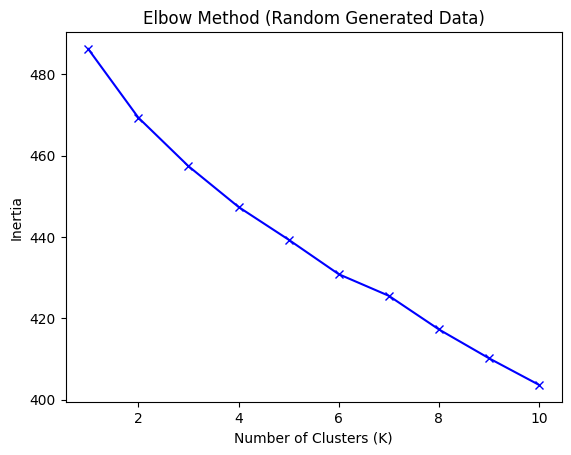

In [ ]:
#modified K means on random data

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We consider a range of k values to dertmine an approproiate value of k
def modified_kmeans(data, data_str):
    k_values = range(1, 11)
    inertia_list = []
    models = []
    # to measure the compactness of the cluster values we use the k intertia
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state = 0, n_init=11)
        models.append(kmeans)
        kmeans.fit(data)
        inertia_list.append(kmeans.inertia_)

    plt.plot(k_values, inertia_list, 'bx-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method ({data_str})')
    plt.show()
    return inertia_list, models

inertias, models = modified_kmeans(data, "Random Generated Data")

In [ ]:
def find_optimal_k(inertia_list):
    # Calculate the differences in inertia values
    diff = [inertia_list[i] - inertia_list[i+1] for i in range(len(inertia_list)-1)]

    # Find the index of the maximum difference
    max_diff_index = diff.index(max(diff))

    # The optimal k value is the index of the maximum difference plus 2 (since indexing starts from 0 and we start k from 1)
    optimal_k = max_diff_index + 2

    return optimal_k

k_val = find_optimal_k(inertias)

In [ ]:
df.shape

(600, 60)

In [ ]:
#We preprocess data by replacing the null values.
# As the data is already scaled no externak scaling needs to be done for the same

In [ ]:
df = df.fillna(method='ffill', axis=1)
df.isna().any().any()

False

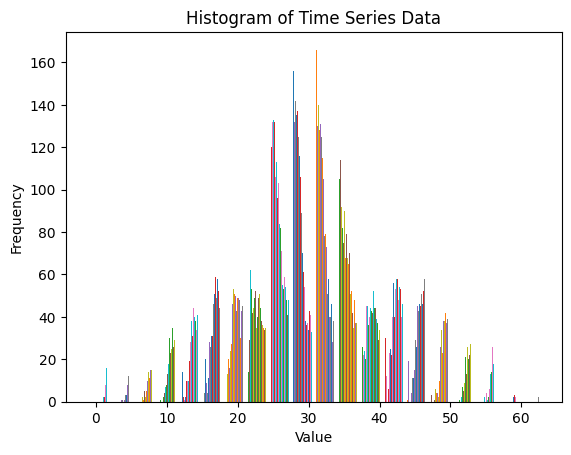

In [ ]:
data = df

import matplotlib.pyplot as plt
plt.hist(data, bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Time Series Data')
plt.show()



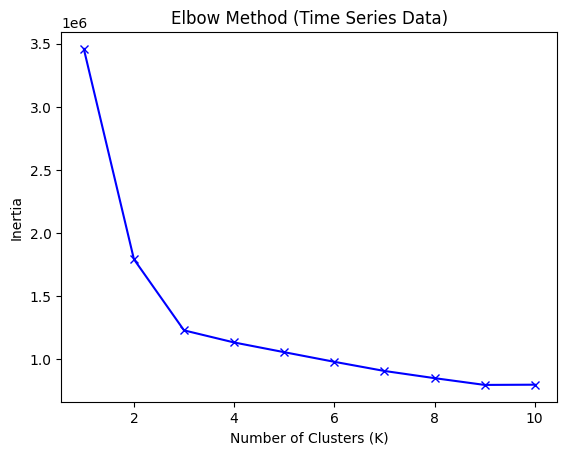

In [ ]:
inertias, models = modified_kmeans(df, "Time Series Data")

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def calculate_scores(max_k, optimal_k):
  print(f"Optimal number of clusters based on intertia score: {optimal_k}")

  # Assuming ground truth labels are known and formatted as described previously
  labels_true = np.repeat(np.arange(6), 100)  #6 indicates the actual no number of clusters/classes

  # Evaluate the selected model against the ground truth
  labels_pred = models[optimal_k - 1].labels_  # optimal_k - 1 because indexing starts at k=1 in models list
  ari = adjusted_rand_score(labels_true, labels_pred)
  nmi = normalized_mutual_info_score(labels_true, labels_pred)

  print(f"Adjusted Rand Index (ARI): {ari}")
  print(f"Normalized Mutual Information (NMI): {nmi}")

calculate_scores(11, 3)

Optimal number of clusters based on intertia score: 3
Adjusted Rand Index (ARI): 0.5335254609774668
Normalized Mutual Information (NMI): 0.7054366924192704


#Visualize using PCA where K=3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


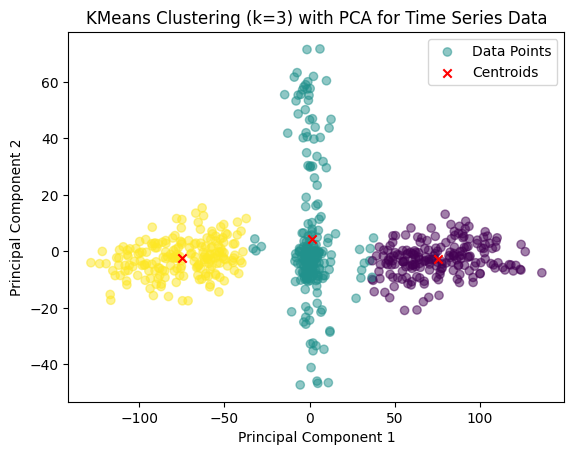

In [ ]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming you have your data stored in a variable named 'data'

# Initialize KMeans model with k=
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Reduce dimensionality of data to 2D using PCA
pca = PCA(n_components=3)
data_2d = pca.fit_transform(data)

# Get cluster centroids in 2D space
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Get cluster labels
labels = kmeans.labels_

# Plot data points
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')

# Plot cluster centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', color='red', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (k=3) with PCA for Time Series Data')
plt.legend()
plt.show()

##Visualize using PCA where K=6

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


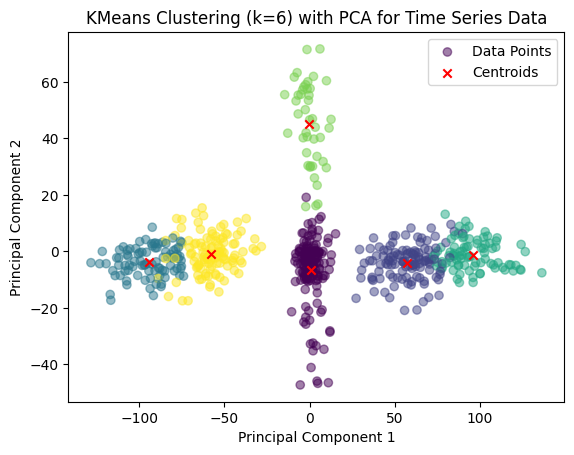

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming you have your data stored in a variable named 'data'

# Initialize KMeans model with k=
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data)

# Reduce dimensionality of data to 2D using PCA
pca = PCA(n_components=3)
data_2d = pca.fit_transform(data)

# Get cluster centroids in 2D space
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Get cluster labels
labels = kmeans.labels_

# Plot data points
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')

# Plot cluster centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', color='red', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (k=6) with PCA for Time Series Data')
plt.legend()
plt.show()

Q3

In [ ]:
# Update and install LibreOffice
!sudo apt-get update
!sudo apt-get install -y libreoffice

import subprocess
import os

def convert_doc_to_docx(doc_path, output_dir):
    """
    Convert a .doc file to .docx using LibreOffice and save it in the specified output directory.
    :param doc_path: Path to the .doc file
    :param output_dir: Directory where the .docx file will be saved
    """
    # Command to convert the file using LibreOffice in headless mode
    command = [
        'libreoffice', '--headless', '--convert-to', 'docx',
        '--outdir', output_dir, doc_path
    ]
    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Assuming you have a .doc file in your Colab session (you need to upload it or access it via mounted Google Drive)
doc_path = '/content/drive/My Drive/relation.doc'
output_dir = '/content/drive/My Drive/'

convert_doc_to_docx(doc_path, output_dir)

print("Conversion completed. Check the output directory for the converted .docx file.")

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 2s (102 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libreoffice is already the newest version (1:7.3.7-0ubuntu0.22.04.4).
0 upgraded, 0 newl

In [ ]:
!pip install python-docx

In [ ]:
#to convert a docx file to a dataframe
from docx import Document
import re

def extract_data(path):

  doc = Document(path)
  data = []

  for para in doc.paragraphs:
      if para.text.startswith("[") and ']' in para.text:
          line = para.text.split(']')[1].strip()
          parts = line.split()
          data.append(parts)

  df = pd.DataFrame(data, columns= ["Id", "Amount", "From", "To"])
  return df


file_path = '/content/drive/MyDrive/relation.docx'
df = extract_data(file_path)

#we also write the data to disk by writing it to a csv file
df.to_csv('/content/drive/My Drive/relation_data.csv', index=False)

In [ ]:
df.set_index('Id', inplace=True)

# data_types = df.dtypes
# print(data_types)

In [ ]:
data_types = df.dtypes
print(data_types)

Amount    object
From      object
To        object
dtype: object


In [ ]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # 'coerce' will convert invalid parsing to NaN

# Convert 'From' column to int data type
df['From'] = df['From'].astype(int)
df['To'] = df['To'].astype(int)

In [ ]:
df.isna().any()

Amount    False
From      False
To        False
dtype: bool

In [ ]:
data_types = df.dtypes
print(data_types)

Amount    float64
From        int64
To          int64
dtype: object


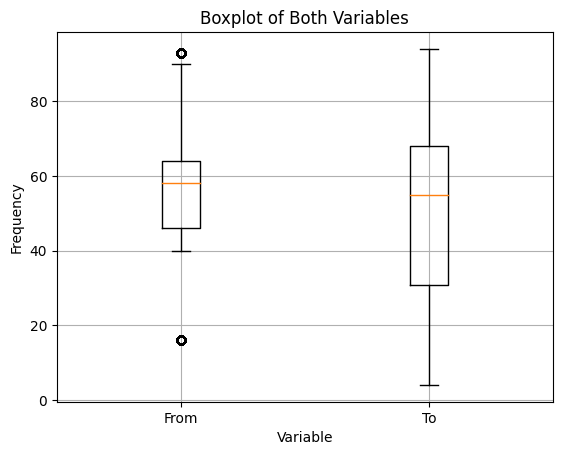

(FROM) Mean: 57.54926519706079, STD: 16.248171727228648
(TO) Mean: 50.756513026052104, STD: 26.086879923779165


In [ ]:
# To get summary statistics for original and reduced data

import matplotlib.pyplot as plt

# Box plot for both 'From' and 'To' columns combined
plt.boxplot([df['From'], df['To']])
plt.xticks([1, 2], ['From', 'To'])  # Set x-axis labels
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('Boxplot of Both Variables')
plt.grid(True)
plt.show()

mean_value = df['From'].mean()
std_deviation = df['From'].std()

print(f"(FROM) Mean: {mean_value}, STD: {std_deviation}")
mean_value = df['To'].mean()
std_deviation = df['To'].std()

print(f"(TO) Mean: {mean_value}, STD: {std_deviation}")

In [ ]:
unique_entries = pd.concat([df['From'], df['To']]).unique()

gf = df.groupby(['From', 'To']).sum().reset_index()

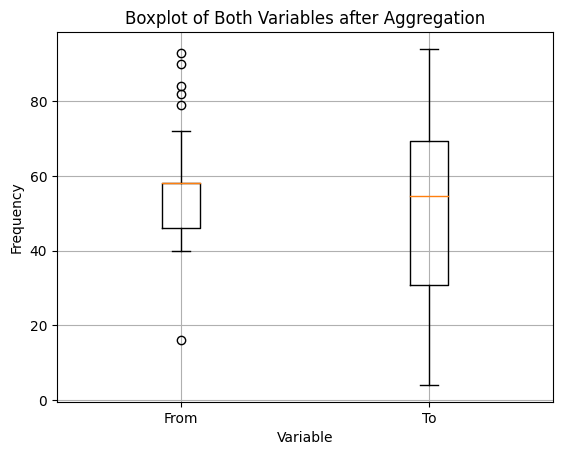

(FROM) Mean: 57.675, STD: 14.253002382764022
(To) Mean: 50.4, STD: 26.435989454936966


In [ ]:
grouped_df = gf
import matplotlib.pyplot as plt

# Box plot for both 'From' and 'To' columns combined
plt.boxplot([grouped_df['From'], grouped_df['To']])
plt.xticks([1, 2], ['From', 'To'])  # Set x-axis labels
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('Boxplot of Both Variables after Aggregation')
plt.grid(True)
plt.show()

mean_value = grouped_df['From'].mean()
std_deviation = grouped_df['From'].std()

print(f"(FROM) Mean: {mean_value}, STD: {std_deviation}")
mean_value = grouped_df['To'].mean()
std_deviation = grouped_df['To'].std()

print(f"(To) Mean: {mean_value}, STD: {std_deviation}")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit scaler to your data (compute mean and standard deviation)
scaler.fit(df)

# Transform your data using the fitted scaler
scaled_data = scaler.transform(df)

# Convert scaled data back to a DataFrame (optional)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [ ]:
unique_entries = pd.concat([df['From'], df['To']]).unique()

grouped_scaled_df = scaled_df.groupby(['From', 'To']).sum().reset_index()

Q4

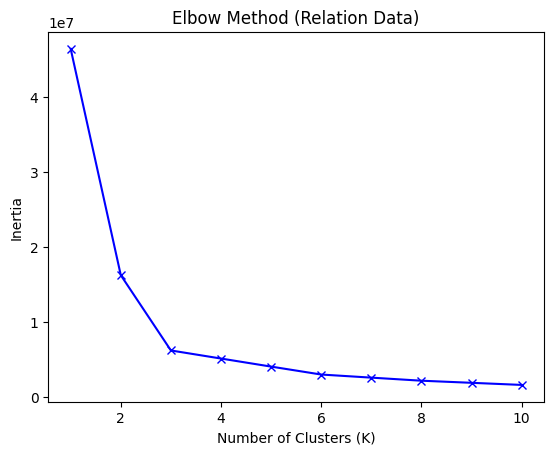

In [ ]:
inertias, models = modified_kmeans(df, "Relation Data")

In [ ]:
unique_entries = pd.concat([scaled_df['From'], df['To']]).unique()

grouped_scaled_df = scaled_df.groupby(['From', 'To']).sum().reset_index()

grouped_df.shape

(40, 3)

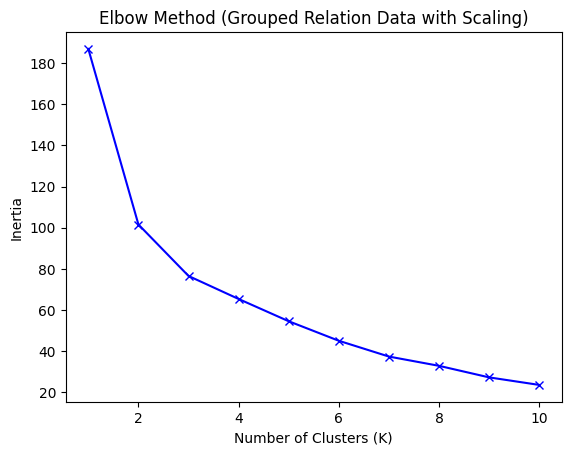

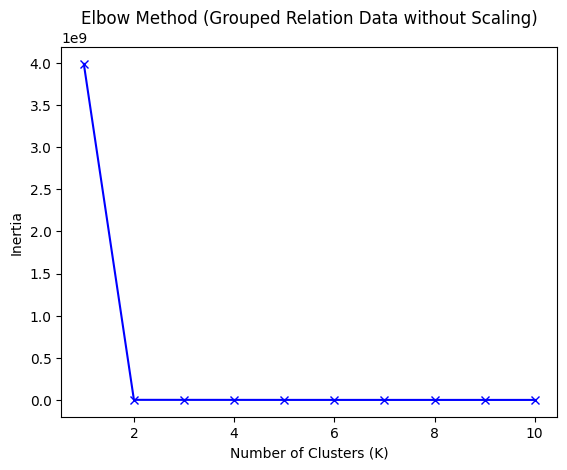

In [ ]:
inertias, models = modified_kmeans(grouped_scaled_df, "Grouped Relation Data with Scaling")
inertias, models = modified_kmeans(gf, "Grouped Relation Data without Scaling")

In [ ]:
from sklearn.metrics import silhouette_score
optimal_k = 3
# Predict the cluster labels for each data point
labels = models[optimal_k-1].labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(gf, labels)
print(silhouette_avg)

0.806508144218658


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


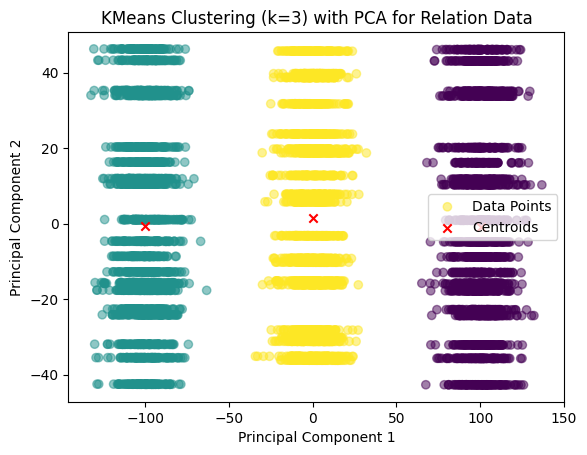

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming you have your data stored in a variable named 'data'

# Initialize KMeans model with k=
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Reduce dimensionality of data to 2D using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)

# Get cluster centroids in 2D space
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Get cluster labels
labels = kmeans.labels_

# Plot data points
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')

# Plot cluster centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', color='red', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (k=3) with PCA for Relation Data')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


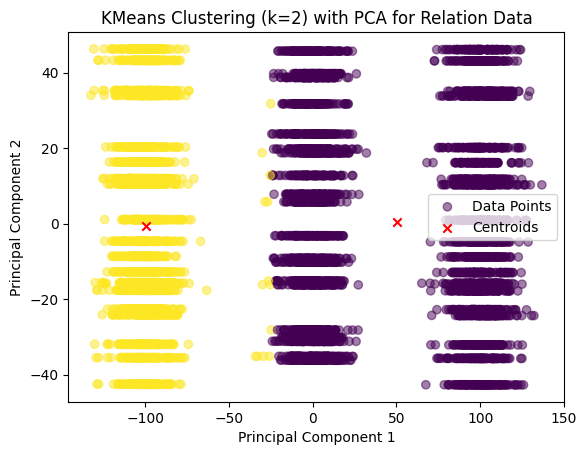

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming you have your data stored in a variable named 'data'

# Initialize KMeans model with k=
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

# Reduce dimensionality of data to 2D using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df)

# Get cluster centroids in 2D space
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Get cluster labels
labels = kmeans.labels_

# Plot data points
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')

# Plot cluster centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', color='red', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (k=2) with PCA for Relation Data')
plt.legend()
plt.show()